In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from support_functions import atipicosAmissing, graficoVcramer, plot_feature_impact_on_disease
pd.set_option('display.max_columns', None)

In [2]:
current_dir = Path.cwd()
DATASETS_LOCATION = os.path.join(current_dir.parent.parent.parent, 'datasets')
MODELS_LOCATION = os.path.join(current_dir.parent.parent, 'models')

In [3]:
df_disease = pd.read_csv(os.path.join(DATASETS_LOCATION, 'blood_samples_dataset.csv'))
var_target = "Disease"

# Esplorazione

In [4]:
# Comprobamos el tipo de formato de las variables variable que se ha asignado en la lectura.
# todas estaaan como queremos
df_disease.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

## valores perdidos

In [5]:
# Comprobamos si hay valores nulos en las variables
print(f"hay {df_disease.isna().sum().sum()} valores perdidos")

hay 0 valores perdidos


## Valores erroneos

In [6]:
descriptivos_max_min = round(df_disease.describe().T[['max', 'min']],2)
descriptivos_max_min

,max,min
Glucose,0.99,0.00
Cholesterol,1.00,0.00
Hemoglobin,1.00,0.00
Platelets,1.00,0.00
White Blood Cells,1.00,-0.00
Red Blood Cells,1.00,0.00
Hematocrit,1.00,0.00
Mean Corpuscular Volume,1.00,0.00
Mean Corpuscular Hemoglobin,1.00,-0.00
Mean Corpuscular Hemoglobin Concentration,1.00,0.00


Tutti i valori sono correttamente fra 0 e 1


## Datos atipicos

In [7]:
# La proporción de valores atípicos se calcula dividiendo la cantidad de valores atípicos por el número total de filas
numericas_input = df_disease.select_dtypes(include = ['int', 'int32', 'int64','float', 'float32', 'float64']).columns
resultados = {x: atipicosAmissing(df_disease[x])[1] / len(df_disease) for x in numericas_input}
resultados = {key: value for key, value in resultados.items() if value!= 0} # elimino la variable si no tiene valores atipicos
if resultados:
    for key, value in resultados.items():
        print(f'{key}: {round(value*100,2)}% de valores atipicos en la variable')
else:
    print("No hay datos atipicos")

No hay datos atipicos


## Distibucion variable target

In [8]:
df_disease[var_target].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

Rinominiamo le variabili target ed eliminiamo heard di

In [9]:
# Rinomina "Thalasse" in "Thalassemia" e "Thromboc" in "Thrombosis"
df_disease[var_target] = df_disease[var_target].replace({
    'Thalasse': 'Thalassemia',
    'Thromboc': 'Thrombosis'
})

# Rimuove le righe con "Heart Di"
df_disease = df_disease[df_disease[var_target] != 'Heart Di']

# Visualizza il conteggio delle malattie aggiornato
print(df_disease[var_target].value_counts())

Disease
Diabetes       834
Anemia         707
Healthy        561
Thalassemia    557
Thrombosis     139
Name: count, dtype: int64


## Correlacion entre variables

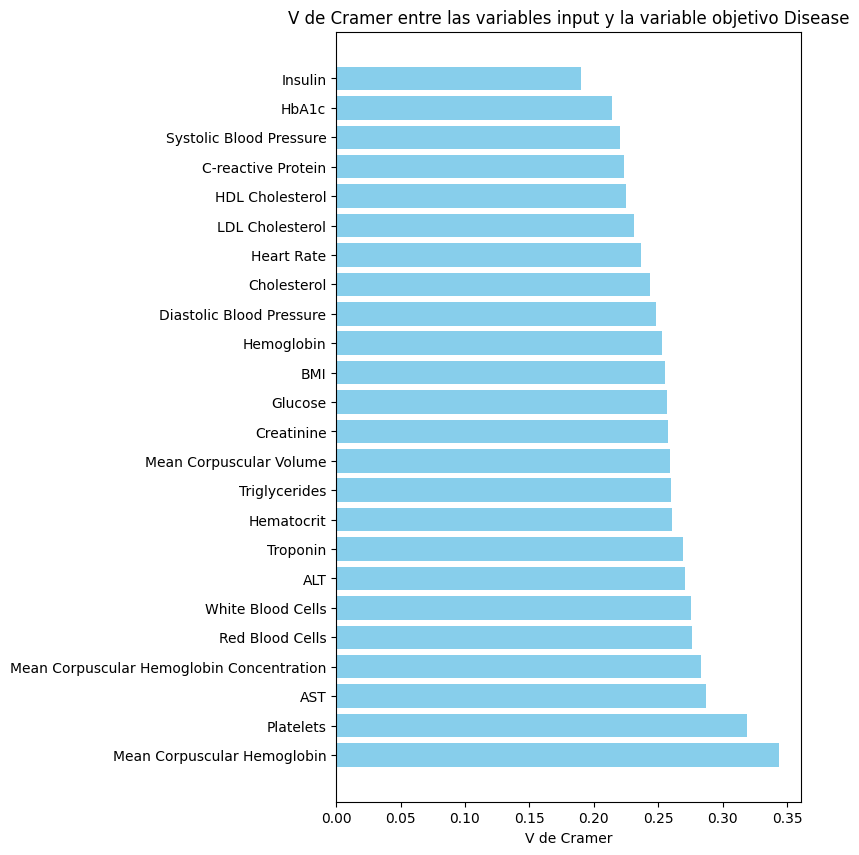

{'Mean Corpuscular Hemoglobin': 0.3435722528967313,
 'Platelets': 0.3187702624531197,
 'AST': 0.28735863127411865,
 'Mean Corpuscular Hemoglobin Concentration': 0.28292157988652966,
 'Red Blood Cells': 0.2757430972696437,
 'White Blood Cells': 0.2755488463251754,
 'ALT': 0.27029673838408164,
 'Troponin': 0.26946401696525846,
 'Hematocrit': 0.2605545295361615,
 'Triglycerides': 0.25961671658786817,
 'Mean Corpuscular Volume': 0.25874336395395536,
 'Creatinine': 0.25784426592757037,
 'Glucose': 0.25640352378625964,
 'BMI': 0.25547676678459463,
 'Hemoglobin': 0.25316357228348,
 'Diastolic Blood Pressure': 0.24836291488530532,
 'Cholesterol': 0.24338911973816213,
 'Heart Rate': 0.23671738116169708,
 'LDL Cholesterol': 0.23103428924150282,
 'HDL Cholesterol': 0.22517992182149074,
 'C-reactive Protein': 0.2230886805522568,
 'Systolic Blood Pressure': 0.2202299294519316,
 'HbA1c': 0.21397251873059836,
 'Insulin': 0.19011220727152253}

In [10]:
graficoVcramer(df_disease.drop(columns=[var_target]), df_disease[var_target])

In [11]:
plot_feature_impact_on_disease(dataframe=df_disease,
                               target_variable=var_target,
                               feature_name=var_target)